# Expirementation of learning of an Afterstate Player.

## 1. Initialization

### 1.1. Importation of modules and functions

We start by import all important modules and functions that we can find in the link https://github.com/fcarsten/tic-tac-toe/tree/master/tic_tac_toe 

In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

from tic_tac_toe.Board import Board, GameResult, CROSS, NAUGHT, EMPTY
from tic_tac_toe.Player import Player
from tic_tac_toe.RandomPlayer import RandomPlayer
from tic_tac_toe.MinMaxAgent import MinMaxAgent
from tic_tac_toe.RndMinMaxAgent import RndMinMaxAgent
from tic_tac_toe.TabularQPlayer import TQPlayer
from tic_tac_toe.ASPlayer import ASPlayer


from tic_tac_toe.Board import Board, GameResult, CROSS, NAUGHT, EMPTY
from util import battle,play_game

In [2]:
def eval_players(p1 : Player, p2 : Player, num_battles : int, games_per_battle = 100, loc='best'):
    p1_wins = []
    p2_wins = []
    draws = []
    count = []    

    for i in range(num_battles):
        p1win, p2win, draw = battle(p1, p2, games_per_battle, True)
        p1_wins.append(p1win*100.0/games_per_battle)
        p2_wins.append(p2win*100.0/games_per_battle)
        draws.append(draw*100.0/games_per_battle)
        count.append(i*games_per_battle)
        p1_wins.append(p1win*100.0/games_per_battle)
        p2_wins.append(p2win*100.0/games_per_battle)
        draws.append(draw*100.0/games_per_battle)
        count.append((i+1)*games_per_battle)

    plt.ylabel('Game outcomes in %')
    plt.xlabel('Game number')

    plt.plot(count, draws, 'r-', label='Draw')
    plt.plot(count, p1_wins, 'g-', label='Player 1 wins')
    plt.plot(count, p2_wins, 'b-', label='Player 2 wins')
    plt.legend(loc=loc, shadow=True, fancybox=True, framealpha =0.7)

##  Let see how the ASPlayer behaves after getting trained with other opponent

In [3]:
Asplayer1 = ASPlayer()
Asplayer2 = ASPlayer()
TQplayer1 = TQPlayer()
TQplayer2 = TQPlayer()

In [4]:
MinMaxplayer = MinMaxAgent()
Rdplayer = RandomPlayer()

### Let train it with TQPlayer: (The TQplayer is improving itself also)

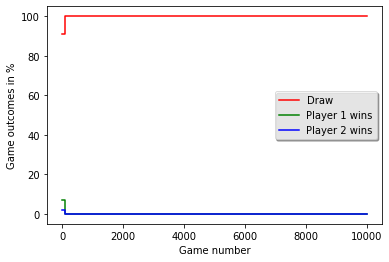

In [16]:
TQplayer1 = TQPlayer()
Asplayer2 = ASPlayer()
eval_players(TQplayer1, Asplayer2, 100)

The Asplayer was able to do 100% of draw before 4500 games

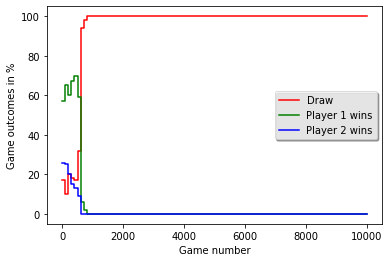

In [6]:
player1 = ASPlayer()
player2 = TQPlayer()
eval_players(player1, player2, 100)

But seems like the TQPlayer is learning fast on how to never loose against the ASPlayer then the reverse.

### Test with the reandom player

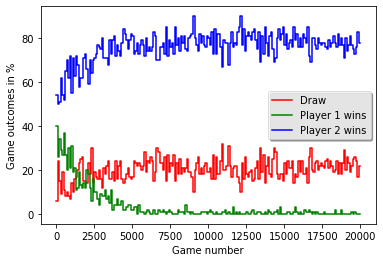

In [13]:
player1 = RandomPlayer()
player2 = ASPlayer()
eval_players(player1, player2, 200)

He learnt to beat more the random player but the TQPlayer was better on how to beat often the random player

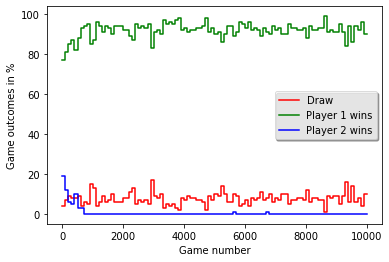

In [15]:
player1 = ASPlayer()
player2 = RandomPlayer()
eval_players(player1, player2, 100)

Here by going first the result is more intersting then the result of TQPlayer player going first against the random player

### Test with Minmax going first  and last

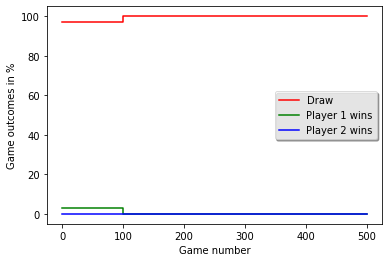

In [9]:
player1 = MinMaxAgent()
player2 = ASPlayer()
eval_players(player1, player2, 5)

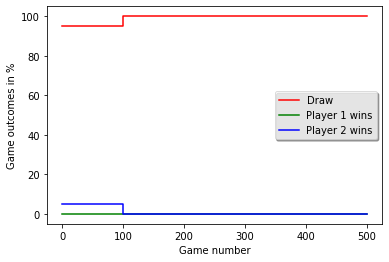

In [10]:
player1 = ASPlayer()
player2 = MinMaxAgent()
eval_players(player1, player2, 5)

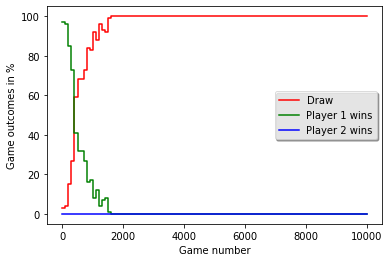

In [11]:
player1 = RndMinMaxAgent()
player2 = ASPlayer()
eval_players(player1, player2, 100)

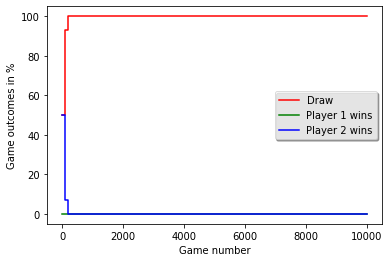

In [12]:
player1 = ASPlayer()
player2 = RndMinMaxAgent()
eval_players(player1, player2, 100)

In [13]:
board = Board()
play_game(board,player1,player2)
print(board)

x|o|x
-----
o|x| 
-----
x| |o




It learned fast to draw against the Minmax! Weirdly intersting.

The same result!